# TP4 - Perceptron
---

## Implémentation

In [18]:
from arftools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import time
from random import shuffle

In [47]:
def decorator_vec(fonc):
    def vecfonc(datax,datay,w,*args,**kwargs):
        if not hasattr(datay,"__len__"):
            datay = np.array([datay])
        datax,datay,w =  datax.reshape(len(datay),-1),datay.reshape(-1,1),w.reshape((1,-1))
        return fonc(datax,datay,w,*args,**kwargs)
    return vecfonc

#-------------------------------------------------
@decorator_vec
def mse(datax,datay,w):
    """ retourne la moyenne de l'erreur aux moindres carres """
    return np.mean((np.dot(datax, w.T) - datay)**2)
    
@decorator_vec
def mse_g(datax,datay,w):
    """ retourne le gradient moyen de l'erreur au moindres carres """
    return np.mean(2 * datax * (np.dot(datax, w.T)- datay) ) 
#---------------------------------------------------

@decorator_vec
def hinge(datax,datay,w):
    """ retourn la moyenne de l'erreur hinge """
    # formule du cours 
    # E( max(0, -y*fw(x)))
    
    return np.mean(np.maximum(0, -datay * np.dot(datax, w.T)))

@decorator_vec
def hinge_g(datax,datay,w):
    """ retourne le gradient moyen de l'erreur hinge """
    tmp =  np.sign(np.maximum(0, -datay * np.dot(datax, w.T)))
    res = np.mean( tmp*(-datax*datay),0)
    #res = np.dot(tmp.T, ( -datay * datax))
    return res 
   


In [5]:
class MonException(Exception):
    def __init__(self,raison):
        self.raison = raison

    def __str__(self):
        return self.raison
    
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.colorbar()



def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()

In [6]:
import random

In [7]:
import copy
class Lineaire(object):
    def __init__(self,loss=hinge,loss_g=hinge_g,max_iter=1000,eps=0.01,\
                 random = True, projection = False):
        """ :loss: fonction de cout
            :loss_g: gradient de la fonction de cout
            :max_iter: nombre d'iterations
            :eps: pas de gradient
        """
        self.max_iter, self.eps = max_iter,eps
        self.loss, self.loss_g = loss, loss_g
        self.lossA , self.lossT = [], []
        self.random = random
        self.projection = projection 
        
    def fit(self,datax,datay,testx=None,testy=None):
        """ :datax: donnees de train
            :datay: label de train
            :testx: donnees de test
            :testy: label de test
        """
        datax = self.projection(datax) if self.projection != False else datax 
        testx = self.projection(testx) if self.projection != False else testx
        
        datay = datay.reshape(-1,1) # une colonne et INF lignes 
        N = len(datay)
        datax = datax.reshape(N,-1)
        D = datax.shape[1]
        
        if self.random == True:
            self.w = np.random.random((1,D)) # tiré une matrice de points aleatoirement de taille 1*D 
                                         # D = dim(x), ici = 2 avec valeurs comprises entre 0 et 1       
        else :
            self.w = np.array([datax.mean(0)])
        
        self.init_w = copy.deepcopy(self.w)
        
    
        #perception est une decente de gradient 
        i = 0
        while i < self.max_iter:
            
            self.lossA.append(self.loss(datax, datay, self.w))
            self.w = self.w - self.eps * self.loss_g(datax, datay, self.w)
            self.lossT.append(self.loss(testx, testy, self.w))
            i += 1
        
    def predict(self,datax):
        #formule du cours 
        #g(f(x)) = sign(x, w)
        datax = self.projection(datax) if self.projection != False else datax 
        
        if len(datax.shape)==1:
            datax = datax.reshape(1,-1) # reshape obligatoire 
        return np.sign(np.dot(datax, self.w.T))
    
    def score(self,datax,datay):
        
        p =  self.predict(datax).reshape(len(datay))
        score = len(np.where(p == datay)[0])/len(datay)
        return score



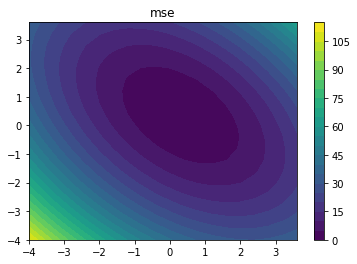

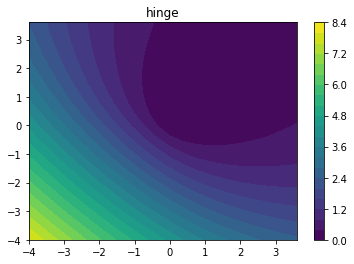

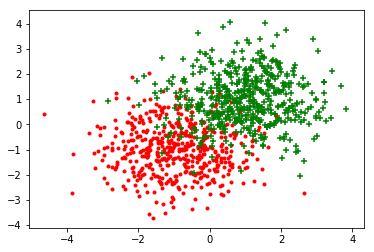

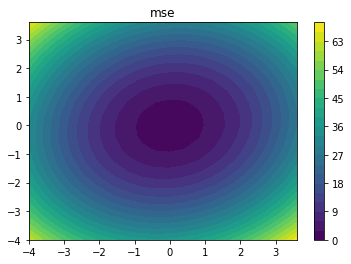

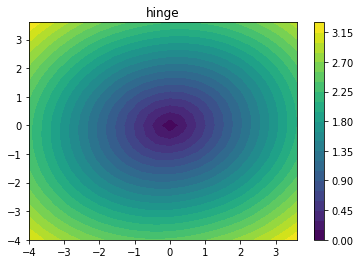

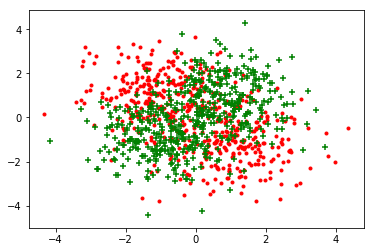

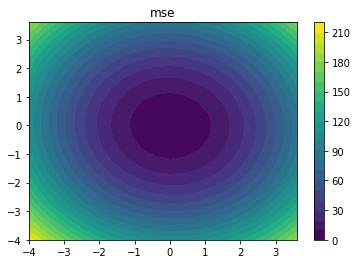

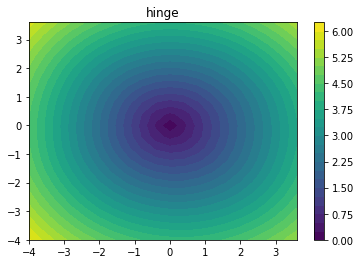

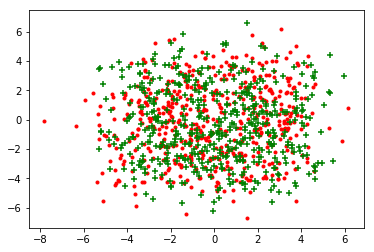

In [8]:
"""Tracer des isoconrbes de l'erreur"""
#
plt.ion()
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
plt.figure()
plt.title("mse")
plot_error(trainx,trainy,mse)
plt.figure()
plt.title("hinge")
plot_error(trainx,trainy,hinge)
plot_data(trainx,trainy)

plt.ion()
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=1)
plt.figure()
plt.title("mse")
plot_error(trainx,trainy,mse)
plt.figure()
plt.title("hinge")
plot_error(trainx,trainy,hinge)
plot_data(trainx,trainy)

plt.ion()
trainx,trainy =  gen_arti(nbex=1000,data_type=2,epsilon=1)
plt.figure()
plt.title("mse")
plot_error(trainx,trainy,mse)
plt.figure()
plt.title("hinge")
plot_error(trainx,trainy,hinge)
plot_data(trainx,trainy)


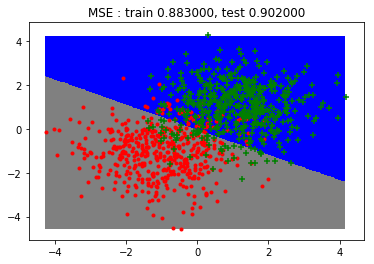

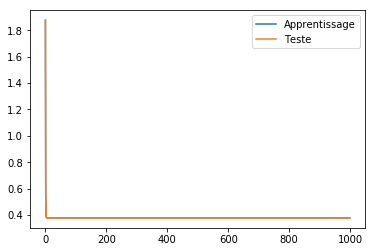

[[ 0.70873986  0.87791038]]
[[ 0.22860506  0.39777558]]


In [19]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)

perceptron = Lineaire(mse,mse_g,max_iter=1000,eps=0.1,random= True, projection = False)
perceptron.fit(trainx,trainy,testx,testy)
text="MSE : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy))
plt.figure()
plot_frontiere(trainx,perceptron.predict,200)
plot_data(trainx,trainy)
plt.title(str(text))

plt.show()

plt.plot(perceptron.lossA, label = "Apprentissage")
plt.plot(perceptron.lossA, label = "Teste")
plt.legend()
plt.show()

print(perceptron.init_w)
print(perceptron.w)

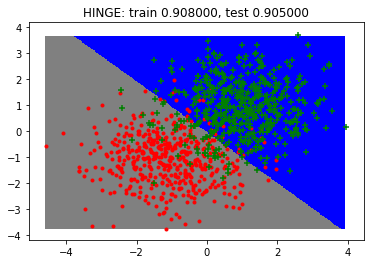

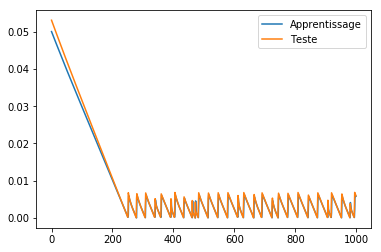

[[ 0.7982396   0.78142637]]
[[ 0.087685   0.0898646]]


In [20]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)

perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1)
perceptron.fit(trainx,trainy,testx,testy)
text="HINGE: train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy))
plt.figure()
plot_frontiere(trainx,perceptron.predict,200)
plot_data(trainx,trainy)
plt.title(str(text))

plt.show()

plt.plot(perceptron.lossA, label = "Apprentissage")
plt.plot(perceptron.lossT, label = "Teste")
plt.legend()
plt.show()

print(perceptron.init_w)
print(perceptron.w)

## Données USPS

In [21]:
datax_train, datay_train = load_usps("USPS_train.txt")
datax_test, datay_test   = load_usps("USPS_test.txt")

# OoneVsOne

In [22]:
def oneVsOne(datax_train,datay_train,class1,class2):
    
    lx2,ly2, lx1,ly1 =  [], [] , [], [] # datax_train, datay_train 

    for index, val in enumerate(datay_train):
        if val == class1:
            ly1.append(1)
            lx1.append(datax_train[index])
        else:
            if val == class2:
                ly2.append(-1)
                lx2.append(datax_train[index])
                
    #shuffle    
    lxy1 = list(zip(lx1, ly1))
    lxy2 = list(zip(lx2, ly2))
    shuffle(lxy1)
    shuffle(lxy2)
    lx1 , ly1 =  list(zip(*lxy1) )
    lx2 , ly2 =  list(zip(*lxy2) )

    #reblancage des classes
    lx1 = lx1[0:min(len(lx1),len(lx2))] 
    ly1 = ly1[0:len(lx1)]
    lx2 = lx2[0:len(lx1)]
    ly2 = ly2[0:len(lx1)]
    
    return np.array(lx1 + lx2),np.array(ly1 + ly2)

In [23]:
def oneVsAll(datax_train,datay_train,class1):
    
    lx2,ly2, lx1,ly1 =  [], [] , [], [] # datax_train, datay_train 

    for index, val in enumerate(datay_train):
        if val == class1:
            ly1.append(1)
            lx1.append(datax_train[index])
        else:
            ly2.append(-1)
            lx2.append(datax_train[index])
                
    #shuffle 
    #shuffle 
    
    lxy1= [ [i,j] for i,j in zip(lx1,ly1)]
    lxy2= [ [i,j] for i,j in zip(lx2,ly2)]
    
    lx1 = list(np.array(lxy1)[0:,0])
    ly1 = list(np.array(lxy1) [0:,1])
    lx2 = list(np.array(lxy2)[0:,0])
    ly2 = list(np.array(lxy2) [0:,1])
    
    #reblancage des classes
    lx1 = lx1[0:min(len(lx1),len(lx2))] 
    ly1 = ly1[0:len(lx1)]
    lx2 = lx2[0:len(lx1)]
    ly2 = ly2[0:len(lx1)]
    
    lx = lx1 + lx2
    ly = ly1 + ly2
    
    lx = np.array(lx)
    ly = np.array(ly)
    
    return lx,ly

In [24]:
class1=6
class2=9
lx,ly   = oneVsOne(datax_train,datay_train,class1,class2)
lxt,lyt = oneVsOne(datax_test,datay_test,class1,class2)


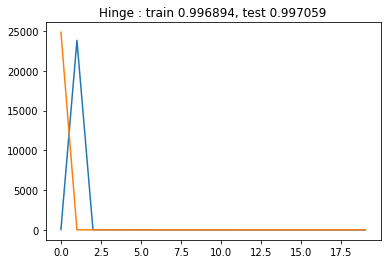

Hinge : train 0.996894, test 0.997059


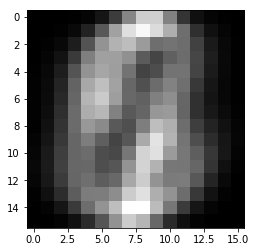

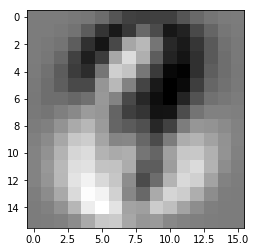

In [42]:
# Classification avec hinge
perceptron5 = Lineaire(hinge,hinge_g,max_iter=20,eps=1,random = False)
perceptron5.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron5.score(lx,ly)\
                                     ,perceptron5.score(lxt,lyt))
plt.title(text)
plt.plot(perceptron5.lossA)
plt.plot(perceptron5.lossT)
plt.show()
print(text)
initPoint = perceptron5.init_w
finalPoint = perceptron5.w


plt.imshow(initPoint.reshape((16,16)), cmap="gray" )
plt.show()
plt.imshow(finalPoint.reshape((16,16)), cmap="gray" )
plt.show()


Hinge : train 0.996894, test 0.997059


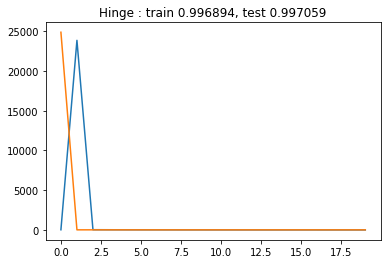

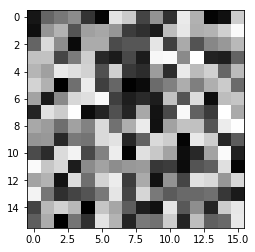

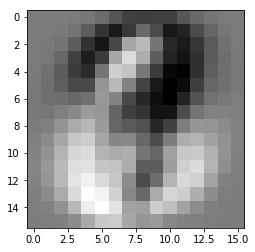

In [43]:
# Classification avec hinge
perceptron5 = Lineaire(hinge,hinge_g,max_iter=20,eps=1,random = True)
perceptron5.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron5.score(lx,ly)\
                                    ,perceptron5.score(lxt,lyt))
print(text)
plt.title(text)
plt.plot(perceptron5.lossA)
plt.plot(perceptron5.lossT)
plt.show()

initPoint = perceptron5.init_w
finalPoint = perceptron5.w


plt.imshow(initPoint.reshape((16,16)), cmap="gray" )
plt.show()
plt.imshow(finalPoint.reshape((16,16)), cmap="gray" )
plt.show()


Hinge : train 0.995342, test 0.997059


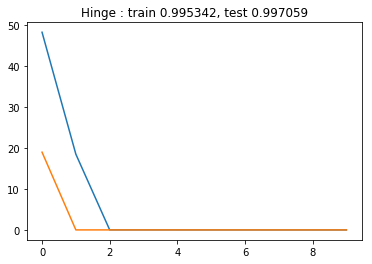

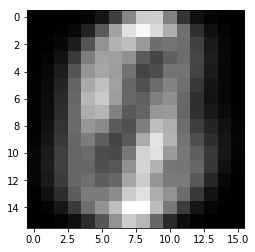

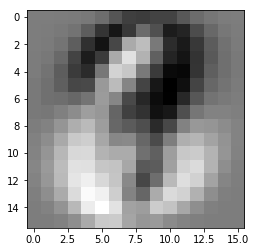

In [27]:
# Classification avec hinge
perceptron5 = Lineaire(hinge,hinge_g,max_iter=10,eps=1,random = False)
perceptron5.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron5.score(lx,ly)\
                                    ,perceptron5.score(lxt,lyt))
print(text)
plt.title(text)
plt.plot(perceptron5.lossA)
plt.plot(perceptron5.lossT)
plt.show()

initPoint = perceptron5.init_w
finalPoint = perceptron5.w


plt.imshow(initPoint.reshape((16,16)), cmap="gray" )
plt.show()
plt.imshow(finalPoint.reshape((16,16)), cmap="gray" )
plt.show()


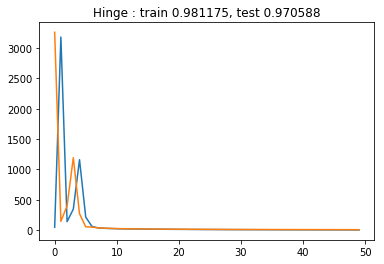

Hinge : train 0.981175, test 0.970588


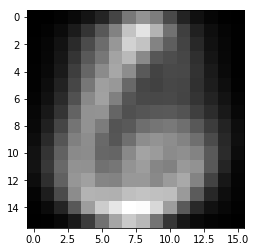

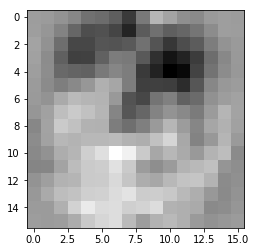

Hinge : train 0.983434, test 0.970588


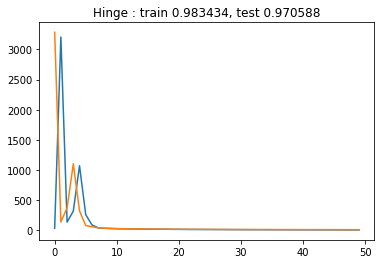

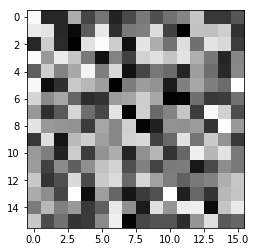

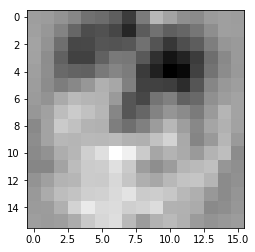

In [44]:
class1=6
lx,ly= oneVsAll(datax_train,datay_train,class1)
lxt,lyt = oneVsAll(datax_test,datay_test,class1)

# Classification avec hinge
perceptron5 = Lineaire(hinge,hinge_g,max_iter=50,eps=0.1,random = False)
perceptron5.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron5.score(lx,ly)\
                                     ,perceptron5.score(lxt,lyt))
plt.title(text)
plt.plot(perceptron5.lossA)
plt.plot(perceptron5.lossT)
plt.show()
print(text)
initPoint = perceptron5.init_w
finalPoint = perceptron5.w


plt.imshow(initPoint.reshape((16,16)), cmap="gray" )
plt.show()
plt.imshow(finalPoint.reshape((16,16)), cmap="gray" )
plt.show()
# Classification avec hinge
perceptron5 = Lineaire(hinge,hinge_g,max_iter=50,eps=0.1,random = True)
perceptron5.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron5.score(lx,ly)\
                                     ,perceptron5.score(lxt,lyt))
plt.title(text)
print(text)
plt.plot(perceptron5.lossA)
plt.plot(perceptron5.lossT)
plt.show()

initPoint = perceptron5.init_w
finalPoint = perceptron5.w


plt.imshow(initPoint.reshape((16,16)), cmap="gray" )
plt.show()
plt.imshow(finalPoint.reshape((16,16)), cmap="gray" )
plt.show()


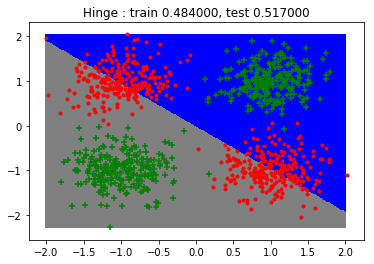

In [218]:
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)

perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.01, \
                      random = True, projection = False)
perceptron.fit(trainx,trainy,testx,testy)
text = "Hinge : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy))
plt.figure()
plt.title(text)
plot_frontiere(trainx,perceptron.predict,200)
plot_data(trainx,trainy)
plt.show()

In [29]:
def projectionDim3(datax):
    return np.concatenate((  [[1]*len(datax)],[ datax[:,0]**2], [datax[:,1]**2] ),axis=0).T # transposé sinon erreur
def projectionDim6(datax):
    return np.concatenate(([[1]*len(datax)], [datax[:,0]], [datax[:,1]],\
                           [datax[:,0]**2], [datax[:,1]**2], [datax[:,0]*datax[:,1]]), axis=0).T # transposé sinon erreur

In [30]:
def resultat(trainx,trainy , testx,testy, myprojection , myrandom):

    perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.01, \
                          random = myrandom, projection = myprojection)
    perceptron.fit(trainx,trainy,testx,testy)
    text = "Hinge : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy))
    plt.figure()
    plt.title(text)

    plot_frontiere(trainx,perceptron.predict,200)
    plot_data(trainx,trainy)
    plt.show()
    

    perceptron = Lineaire(mse,mse_g,max_iter=1000,eps=0.01, \
                          random = myrandom, projection = myprojection)
    perceptron.fit(trainx,trainy,testx,testy)
    text = "MSe : train %f, test %f"% (perceptron.score(trainx,trainy),perceptron.score(testx,testy))
    plt.figure()
    plt.title(text)

    plot_frontiere(trainx,perceptron.predict,200)
    plot_data(trainx,trainy)
    plt.show()

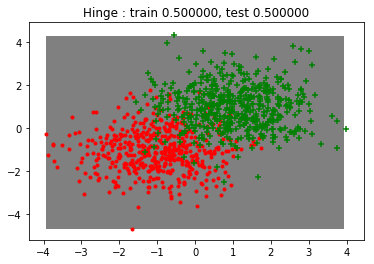

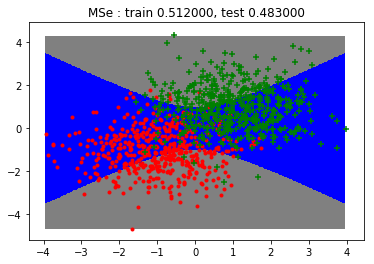

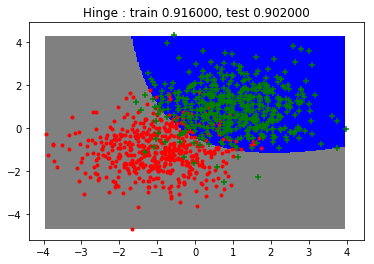

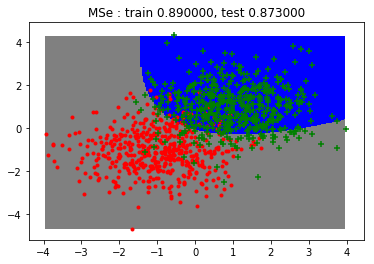

In [234]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)
resultat( trainx,trainy , testx,testy, projectionDim3, True )
resultat( trainx,trainy , testx,testy, projectionDim6, True )

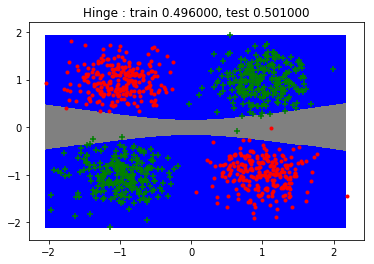

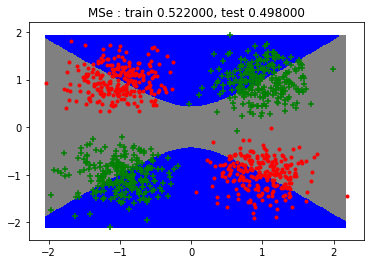

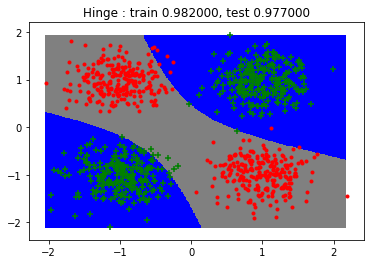

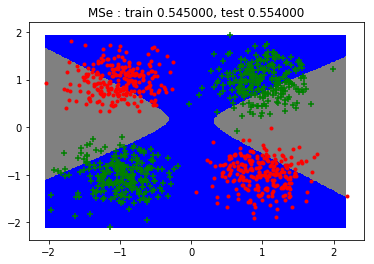

In [235]:
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
resultat( trainx,trainy , testx,testy, projectionDim3, True )
resultat( trainx,trainy , testx,testy, projectionDim6, True )

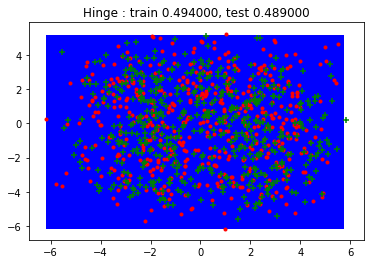

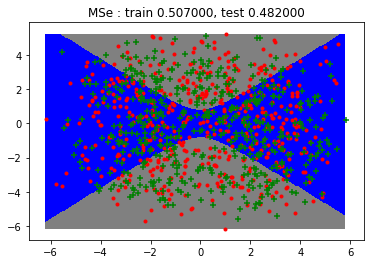

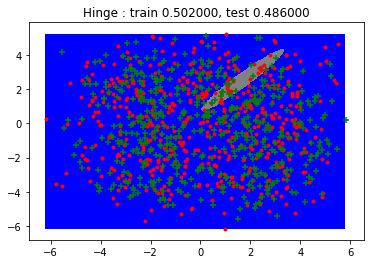

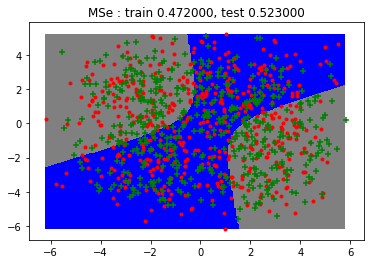

In [236]:
trainx,trainy =  gen_arti(nbex=1000,data_type=2,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=2,epsilon=1)
resultat( trainx,trainy , testx,testy, projectionDim3, True )
resultat( trainx,trainy , testx,testy, projectionDim6, True )

In [97]:
max_iter = 100
class1, class2= 6, 9
datax_train, datay_train = load_usps("USPS/USPS_train.txt")
datax_test, datay_test = load_usps("USPS/USPS_test.txt")
lx,ly= oneVsOne(datax_train,datay_train,class1,class2)
lxt,lyt= oneVsOne(datax_test,datay_test,class1,class2)

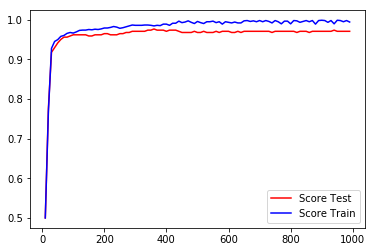

In [237]:
#hinge
scoreTrain, scoreTest , iteration =[],[],[]

for i in range(10,max_iter,10):
    perceptron6 = Lineaire(hinge,hinge_g,max_iter=i,eps=0.1,random=False,projection=False)
    perceptron6.fit(lx,ly,lxt,lyt)
    
    scoreTrain.append(perceptron6.score(lx,ly))
    scoreTest.append(perceptron6.score(lxt,lyt))
    iteration.append(i)
    
plt.plot(iteration,scoreTest,'r',label='Score Test')          #plt.plot(X,Y)
plt.plot(iteration,scoreTrain,'b',label='Score Train') 
plt.legend()
plt.show()


Avec un batch et ce type de donnée on arrive a convergence tres rapidement, on ne peut pas parler de sur-apprentissage vu les resltats du teste.
au bout d'un nombre tres grand d'itération le modele sur apprend sa base de teste et converge vers 1 alors que qu'il ne fait pas mieux de 0.98 sur les données du tests.
avec une difference de 0.02 on ne peut pas parler de sur apprentissage.

In [31]:
import copy

class Stochastique(object):
    def __init__(self,loss=hinge,loss_g=hinge_g,max_iter=1000,eps=0.01,\
                 random = True, projection = False):
        """ :loss: fonction de cout
            :loss_g: gradient de la fonction de cout
            :max_iter: nombre d'iterations
            :eps: pas de gradient
        """
        self.max_iter, self.eps = max_iter,eps
        self.loss, self.loss_g = loss, loss_g
        self.lossA , self.lossT = [], []
        self.random = random
        self.projection = projection 
        
    def fit(self,datax,datay,testx=None,testy=None):
        """ :datax: donnees de train
            :datay: label de train
            :testx: donnees de test
            :testy: label de test
        """
        self.lossA , self.lossT = [], []
        datax = self.projection(datax) if self.projection != False else datax 
        testx = self.projection(testx) if self.projection != False else testx
        
        datay = datay.reshape(-1,1) # une colonne et INF lignes 
        N = len(datay)
        datax = datax.reshape(N,-1)
        D = datax.shape[1]
        self.w = np.random.random((1,D)) if self.random == True else np.array([datax.mean(0)])         
        self.init_w = copy.deepcopy(self.w)
        
        for _ in range (self.max_iter):
            i = random.choice(range(0,len(datax)))
            datax_sample, datay_sample = datax[i], datay[i]
            datax_sample = np.array([datax_sample])
            datay_sample = np.array([datay_sample])
            ii = random.choice(range(0, len(testx)))
            testx_sample = np.array([testx[ii]])
            testy_sample = np.array([testy[ii]])
            self.lossA.append(self.loss(datax_sample , datay_sample , self.w))
            self.w = self.w - self.eps * self.loss_g(datax, datay, self.w)
            self.lossT.append(self.loss(testx_sample , testy_sample , self.w))
            

    def predict(self,datax):
        datax = self.projection(datax) if self.projection != False else datax 
        if len(datax.shape)==1:
            datax = datax.reshape(1,-1) # reshape obligatoire 
        return np.sign(np.dot(datax, self.w.T))
    
    def score(self,datax,datay):
        
        p =  self.predict(datax).reshape(len(datay))
        score = len(np.where(p == datay)[0])/len(datay)
        return score



1523572648.343305 seconds wall time
Hinge : train 1.000000, test 0.985294


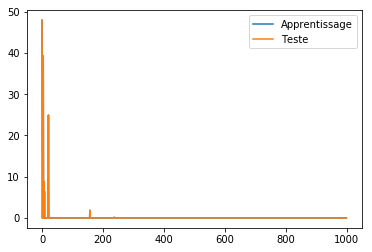

0.0 seconds wall time
Hinge : train 1.000000, test 0.991176


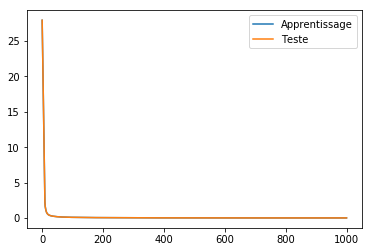

In [33]:

max_iter = 100
class1, class2= 6, 9
datax_train, datay_train = load_usps("USPS_train.txt")
datax_test, datay_test = load_usps("USPS_test.txt")
lx,ly= oneVsOne(datax_train,datay_train,class1,class2)
lxt,lyt= oneVsOne(datax_test,datay_test,class1,class2)
t0 = time.clock()
perceptron = Stochastique(hinge,hinge_g,max_iter=1000,eps=0.1, \
                      random = True , projection = False)
print( (time.time() - t0), "seconds wall time")

perceptron.fit(lx,ly,lxt,lyt)
text = "Hinge : train %f, test %f"% (perceptron.score(lx,ly),perceptron.score(lxt,lyt))
print(text) 
plt.show()

plt.plot(perceptron.lossA, label = "Apprentissage")
plt.plot(perceptron.lossA, label = "Teste")
plt.legend()
plt.show()

t0 = time.time()

perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.1, \
                      random = True , projection = False)

perceptron.fit(lx,ly,lxt,lyt)
print( (time.time() - t0), "seconds wall time")

text = "Hinge : train %f, test %f"% (perceptron.score(lx,ly),perceptron.score(lxt,lyt))
print(text)
plt.show()

plt.plot(perceptron.lossA, label = "Apprentissage")
plt.plot(perceptron.lossA, label = "Teste")
plt.legend()
plt.show()


In [36]:
class BaggedPerceptron:
    def __init__(self, nb_perceptron=10, **perceptron_parameters):
        self.clfs = [Stochastique(**perceptron_parameters) for _ in range(nb_perceptron)]
    
    def fit(self, *data):
        for clf in self.clfs:
            clf.fit(*data)
    
    def predict(self, testx):
        preds = np.array([clf.predict(testx) for clf in self.clfs])
        return np.array(preds.mean(0) > 0, dtype=int).T * 2 - 1

In [48]:
clf = BaggedPerceptron(20, random=False, max_iter=1000, eps=0.01)
clf.fit(lx, ly, lxt, lyt)

In [49]:
(clf.predict(lxt)[0] == lyt).mean()

0.96176470588235297